In [2]:
# Importing relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
df = pd.read_csv('credit_data.csv')

# Check the shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset has 25000 rows and 17 columns.


In [4]:
# Display first 5 rows
print(df.head())




   customer_id  age  gender    location  monthly_income  monthly_emi_outflow  \
0            1   39    Male  Semi-Urban        37960.91             15102.30   
1            2   33  Female       Urban        97982.60             38453.99   
2            3   41    Male  Semi-Urban        72757.31             17259.65   
3            4   50    Male       Rural        46591.58             22157.16   
4            5   32    Male  Semi-Urban        30893.97              6813.03   

   current_outstanding  credit_utilization_ratio  num_open_loans  \
0            237947.63                      0.66               5   
1            734534.97                      0.70               4   
2            102888.54                      0.98               3   
3            197129.05                      0.39               5   
4             81831.67                      0.42               3   

   repayment_history_score  dpd_last_3_months  num_hard_inquiries_last_6m  \
0                    71.68       

In [5]:
# Check data types and missing values
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   25000 non-null  int64  
 1   age                           25000 non-null  int64  
 2   gender                        25000 non-null  object 
 3   location                      25000 non-null  object 
 4   monthly_income                25000 non-null  float64
 5   monthly_emi_outflow           25000 non-null  float64
 6   current_outstanding           25000 non-null  float64
 7   credit_utilization_ratio      25000 non-null  float64
 8   num_open_loans                25000 non-null  int64  
 9   repayment_history_score       25000 non-null  float64
 10  dpd_last_3_months             25000 non-null  int64  
 11  num_hard_inquiries_last_6m    25000 non-null  int64  
 12  recent_credit_card_usage      25000 non-null  float64
 13  r

In [6]:
# Summary statistics
print(df.describe())

        customer_id           age  monthly_income  monthly_emi_outflow  \
count  25000.000000  25000.000000    25000.000000         25000.000000   
mean   12500.500000     34.708640    49870.771464         20004.752214   
std     7217.022701      9.540941    14887.695885         10864.820998   
min        1.000000     18.000000    10000.000000          1057.120000   
25%     6250.750000     28.000000    39786.675000         11165.732500   
50%    12500.500000     35.000000    49844.475000         18480.800000   
75%    18750.250000     41.000000    59897.247500         27210.040000   
max    25000.000000     65.000000   106771.540000         67053.270000   

       current_outstanding  credit_utilization_ratio  num_open_loans  \
count         2.500000e+04              25000.000000    25000.000000   
mean          2.186800e+05                  0.503882        2.996920   
std           1.670782e+05                  0.288836        1.730269   
min           3.183620e+03                  0

## Check Class Distribution

In [7]:
# Check target variable distribution
print(df['target_credit_score_movement'].value_counts())




stable      22472
increase     2433
decrease       95
Name: target_credit_score_movement, dtype: int64


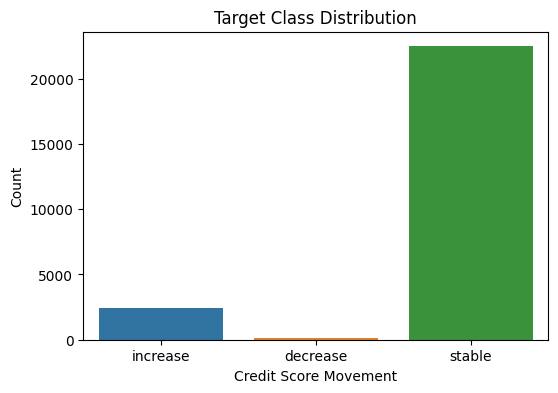

In [8]:
# Visualize class balance

plt.figure(figsize=(6,4))
sns.countplot(x='target_credit_score_movement', data=df, order=['increase', 'decrease', 'stable'])
plt.title("Target Class Distribution")
plt.xlabel("Credit Score Movement")
plt.ylabel("Count")
plt.show()

## Explore Feature Distributions

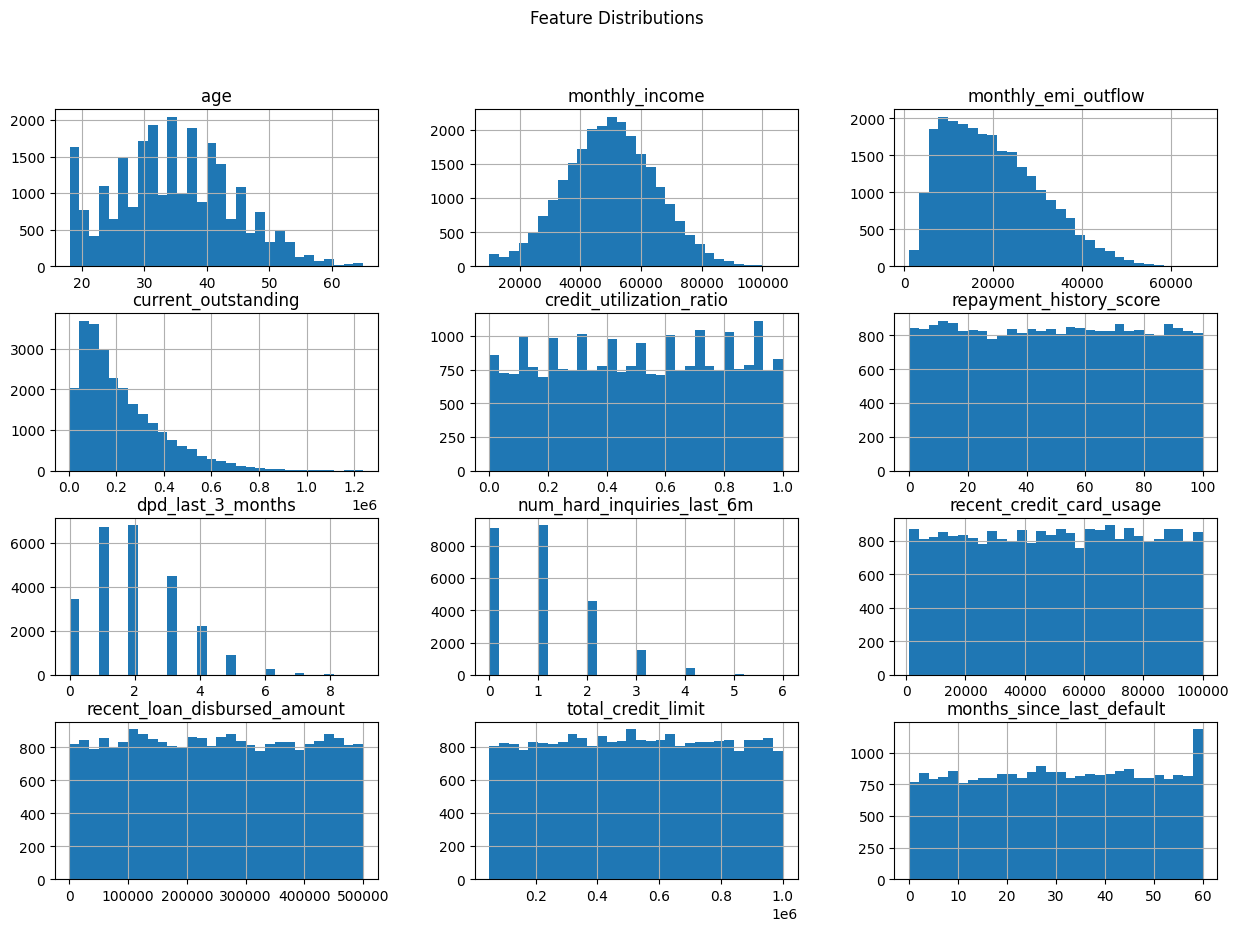

In [10]:
# Plot distribution of numerical features
num_features = ['age', 'monthly_income', 'monthly_emi_outflow', 
                'current_outstanding', 'credit_utilization_ratio', 
                'repayment_history_score', 'dpd_last_3_months', 
                'num_hard_inquiries_last_6m', 'recent_credit_card_usage', 
                'recent_loan_disbursed_amount', 'total_credit_limit', 
                'months_since_last_default']

# Plot histograms
df[num_features].hist(bins=30, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()


## Explore Relationships with Target

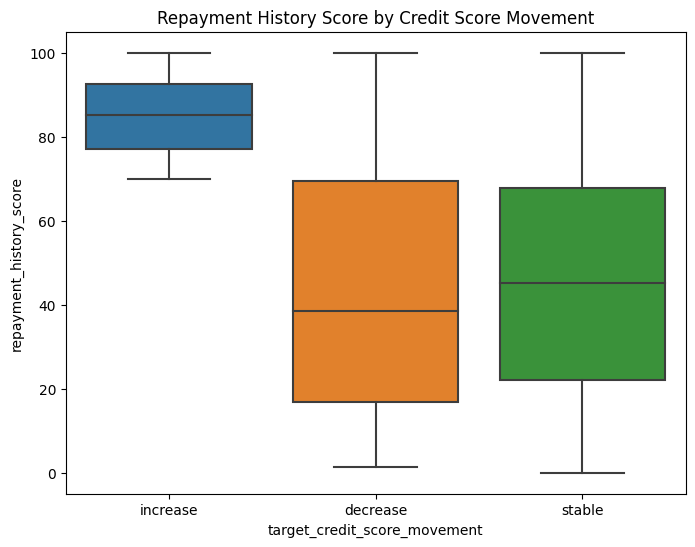

In [11]:
# Boxplot of repayment history score by target class
plt.figure(figsize=(8,6))
sns.boxplot(x='target_credit_score_movement', y='repayment_history_score', data=df, order=['increase', 'decrease', 'stable'])
plt.title("Repayment History Score by Credit Score Movement")
plt.show()


## Correlation Analysis

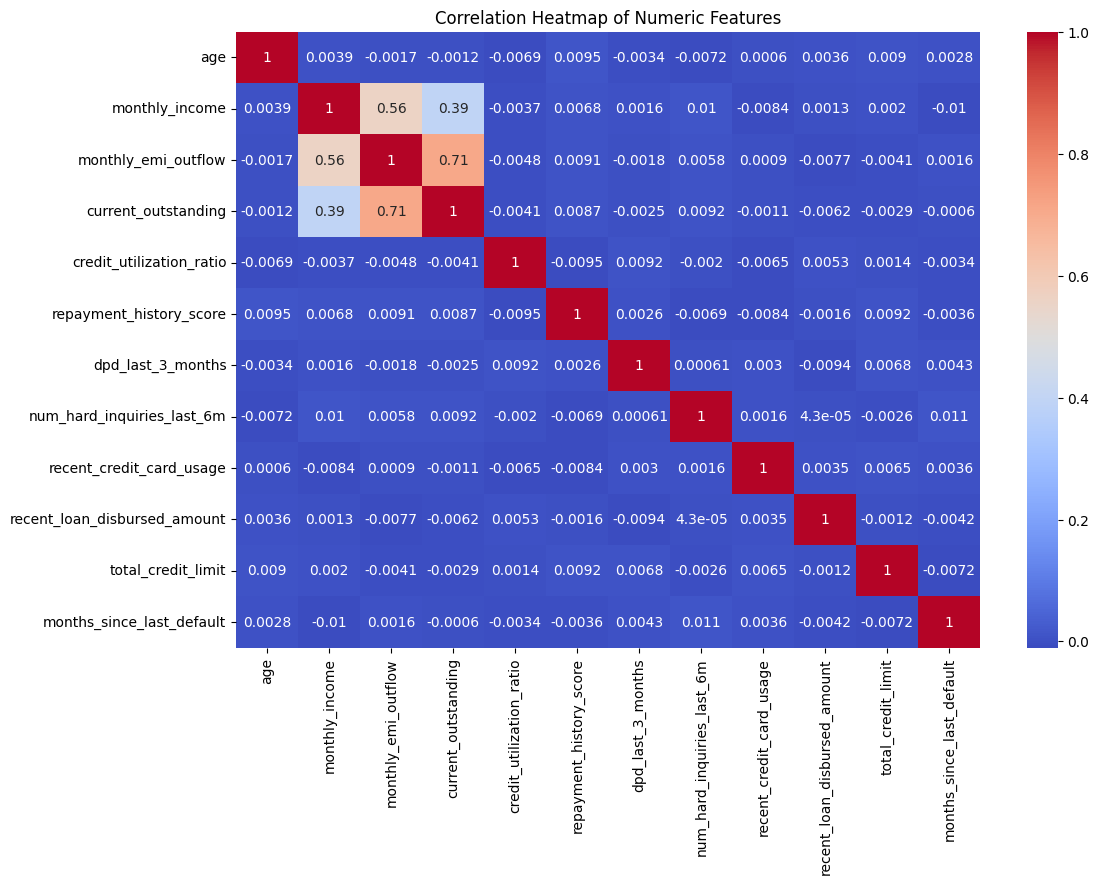

In [12]:
# Calculate correlation matrix
corr_matrix = df[num_features].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## Data Preprocessing

### a. Encode Categorical Variables

In [13]:
# Encode gender and location using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'location'], drop_first=True)


### b. Scale Numerical Features

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])


### c. Check Class Imbalance Again

In [15]:
class_distribution = df['target_credit_score_movement'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)


Class Distribution:
stable      0.89888
increase    0.09732
decrease    0.00380
Name: target_credit_score_movement, dtype: float64


In [16]:
df_encoded.head()

,customer_id,age,monthly_income,monthly_emi_outflow,current_outstanding,credit_utilization_ratio,num_open_loans,repayment_history_score,dpd_last_3_months,num_hard_inquiries_last_6m,recent_credit_card_usage,recent_loan_disbursed_amount,total_credit_limit,months_since_last_default,target_credit_score_movement,gender_Male,location_Semi-Urban,location_Urban
0,1,0.449793,-0.799996,-0.451232,0.115323,0.540520,5,0.754202,-0.701216,-1.008295,0.286082,-0.710485,-0.165324,-0.405245,stable,1,1,0
1,2,-0.179089,3.231715,1.698105,3.087567,0.679009,4,-0.224075,-1.414675,1.993178,-1.670139,1.428006,1.004999,-1.149594,stable,0,0,1
2,3,0.659420,1.537309,-0.252665,-0.693051,1.648437,3,1.656138,0.012243,-1.008295,1.306896,-0.479365,-1.395553,-1.550398,increase,1,1,0
3,4,1.602742,-0.220266,0.198112,-0.128990,-0.394286,5,0.635372,0.725702,-1.008295,-0.122112,-0.567189,-1.294916,1.484259,stable,1,0,0
4,5,-0.283902,-1.274689,-1.214193,-0.819084,-0.290418,3,1.143164,-0.701216,-1.008295,-0.413194,-1.114615,1.543173,1.255228,increase,1,1,0


In [17]:
import pandas as pd

# Load your preprocessed dataset
df = pd.read_csv('credit_data.csv')

# Encode categorical variables (if not done earlier)
df_encoded = pd.get_dummies(df, columns=['gender', 'location'], drop_first=True)

# Separate features and target
X = df_encoded.drop('target_credit_score_movement', axis=1)
y = df_encoded['target_credit_score_movement']

# Encode target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


## Handle Class Imbalance

### A: Class Weights

In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict(zip(np.unique(y_encoded), class_weights))

print("Class Weights:", class_weights_dict)


Class Weights: {0: 87.71929824561404, 1: 3.4251267296889987, 2: 0.37083185000593333}


In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("New Class Distribution:")
from collections import Counter
print(Counter(y_resampled))


New Class Distribution:
Counter({2: 22472, 1: 22472, 0: 22472})


## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


##  Model Training

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    decrease       1.00      1.00      1.00      4494
    increase       0.99      1.00      0.99      4495
      stable       1.00      0.99      0.99      4495

    accuracy                           1.00     13484
   macro avg       1.00      1.00      1.00     13484
weighted avg       1.00      1.00      1.00     13484

Confusion Matrix:
[[4494    0    0]
 [   0 4480   15]
 [   0   45 4450]]


In [24]:
from sklearn.model_selection import train_test_split

# Split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Apply SMOTE on training data only
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [25]:
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    decrease       1.00      1.00      1.00        19
    increase       0.92      0.96      0.94       487
      stable       1.00      0.99      0.99      4494

    accuracy                           0.99      5000
   macro avg       0.97      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000

Confusion Matrix:
[[  19    0    0]
 [   0  468   19]
 [   0   41 4453]]


In [26]:
# Hyperparameter tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='f1_macro',  # balances performance across classes
    cv=5,
    n_jobs=-1,  # use all CPU cores
    verbose=2
)

# Fit on the resampled training set
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [27]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [28]:
# Loop through and evaluate each model
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


🔍 Logistic Regression


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

    decrease       0.00      0.42      0.01        19
    increase       0.47      0.91      0.62       487
      stable       0.98      0.53      0.69      4494

    accuracy                           0.57      5000
   macro avg       0.48      0.62      0.44      5000
weighted avg       0.93      0.57      0.68      5000

Confusion Matrix:
[[   8    4    7]
 [  13  441   33]
 [1607  501 2386]]

🔍 Random Forest
Classification Report:
              precision    recall  f1-score   support

    decrease       1.00      1.00      1.00        19
    increase       0.97      0.93      0.95       487
      stable       0.99      1.00      0.99      4494

    accuracy                           0.99      5000
   macro avg       0.99      0.97      0.98      5000
weighted avg       0.99      0.99      0.99      5000

Confusion Matrix:
[[  19    0    0]
 [   0  451   36]
 [   0   14 4480]]

🔍 XGBoost
Classification Rep

In [30]:
# -------------------- Random Forest Tuning --------------------
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF Macro F1 Score:", rf_grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best RF Macro F1 Score: 0.9688649100579374


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score


# Cross-validation on best Random Forest model
best_rf = rf_grid.best_estimator_
rf_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1_macro')
print("Random Forest 5-Fold Macro F1:", rf_scores)
print("Mean F1:", rf_scores.mean())


Random Forest 5-Fold Macro F1: [0.96112157 0.97794878 0.97270096 0.95344486 0.97910837]
Mean F1: 0.9688649100579374


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Assuming best_rf is already defined and tuned
best_rf = rf_grid.best_estimator_

# Get F1 macro scores across folds
f1_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1_macro')
print("🔍 Random Forest 5-Fold F1 Macro Scores:", f1_scores)
print(" Mean F1 Macro Score:", round(f1_scores.mean(), 4))

# Get accuracy scores across folds
accuracy_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("\n Random Forest 5-Fold Accuracy Scores:", accuracy_scores)
print("Mean Accuracy Score:", round(accuracy_scores.mean(), 4))


🔍 Random Forest 5-Fold F1 Macro Scores: [0.96112157 0.97794878 0.97270096 0.95344486 0.97910837]
 Mean F1 Macro Score: 0.9689

 Random Forest 5-Fold Accuracy Scores: [0.99175 0.98875 0.9915  0.98775 0.989  ]
Mean Accuracy Score: 0.9898


In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Assuming best_rf is your tuned model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validated predictions
y_pred_cv = cross_val_predict(best_rf, X_train, y_train, cv=skf)

# Classification report for each class
print("📋 Classification Report (Cross-Validated):")
print(classification_report(y_train, y_pred_cv, digits=4))

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)
print("\n🔍 Confusion Matrix:")
print(conf_matrix)

# Optionally, display confusion matrix as a DataFrame
class_labels = np.unique(y_train)
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("\n🧾 Confusion Matrix (DataFrame):")
print(df_conf_matrix)


📋 Classification Report (Cross-Validated):
              precision    recall  f1-score   support

           0     1.0000    0.9342    0.9660        76
           1     0.9580    0.9270    0.9423      1946
           2     0.9919    0.9957    0.9938     17978

    accuracy                         0.9888     20000
   macro avg     0.9833    0.9523    0.9674     20000
weighted avg     0.9886    0.9888    0.9887     20000


🔍 Confusion Matrix:
[[   71     1     4]
 [    0  1804   142]
 [    0    78 17900]]

🧾 Confusion Matrix (DataFrame):
    0     1      2
0  71     1      4
1   0  1804    142
2   0    78  17900


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Predict on the full training data
y_train_pred = best_rf.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("✅ Training Accuracy:", round(train_accuracy, 4))

# Detailed classification report
print("\n📋 Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred, digits=4))

# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("\n🔍 Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Optional: display confusion matrix as DataFrame
class_labels = np.unique(y_train)
df_conf_matrix_train = pd.DataFrame(conf_matrix_train, index=class_labels, columns=class_labels)
print("\n🧾 Confusion Matrix (DataFrame):")
print(df_conf_matrix_train)



✅ Training Accuracy: 0.9999

📋 Classification Report (Training Set):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        76
           1     0.9990    1.0000    0.9995      1946
           2     1.0000    0.9999    0.9999     17978

    accuracy                         0.9999     20000
   macro avg     0.9997    1.0000    0.9998     20000
weighted avg     0.9999    0.9999    0.9999     20000


🔍 Confusion Matrix (Training Set):
[[   76     0     0]
 [    0  1946     0]
 [    0     2 17976]]

🧾 Confusion Matrix (DataFrame):
    0     1      2
0  76     0      0
1   0  1946      0
2   0     2  17976


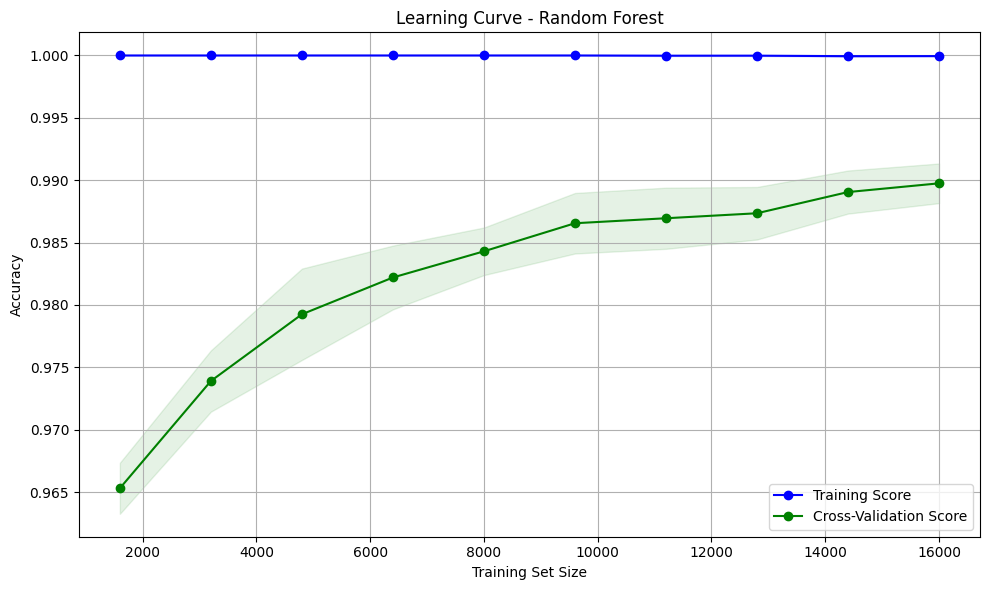

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Plot learning curve for your model
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_rf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Compute means and standard deviations
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Cross-Validation Score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Simpler, faster, less overfit Random Forest
simpler_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,             # Limit tree depth
    min_samples_leaf=5,       # Prevent small leaf nodes
    class_weight='balanced',  # Handle imbalance
    random_state=42,
    n_jobs=-1
)

# Fit the model
simpler_rf.fit(X_train, y_train)

# Evaluate on training set
from sklearn.metrics import accuracy_score, classification_report

y_train_pred_simple = simpler_rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred_simple)

print("✅ Simpler RF Training Accuracy:", round(train_acc, 4))
print("\n📋 Classification Report:")
print(classification_report(y_train, y_train_pred_simple))


✅ Simpler RF Training Accuracy: 0.9757

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.80      1.00      0.89      1946
           2       1.00      0.97      0.99     17978

    accuracy                           0.98     20000
   macro avg       0.93      0.99      0.96     20000
weighted avg       0.98      0.98      0.98     20000



In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Cross-validation for best_rf
cv_acc_best_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_best_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1_macro')

# Cross-validation for simpler_rf
cv_acc_simple_rf = cross_val_score(simpler_rf, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_simple_rf = cross_val_score(simpler_rf, X_train, y_train, cv=5, scoring='f1_macro')

# Create comparison DataFrame
cv_results_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Accuracy (Best RF)': cv_acc_best_rf,
    'F1 Macro (Best RF)': cv_f1_best_rf,
    'Accuracy (Simpler RF)': cv_acc_simple_rf,
    'F1 Macro (Simpler RF)': cv_f1_simple_rf,
})

# Display results
print("\n📊 Cross-Validation Performance Comparison")
print(cv_results_df)
print("\n✅ Mean Accuracy (Best RF):", round(cv_acc_best_rf.mean(), 4))
print("✅ Mean F1 Macro (Best RF):", round(cv_f1_best_rf.mean(), 4))
print("✅ Mean Accuracy (Simpler RF):", round(cv_acc_simple_rf.mean(), 4))
print("✅ Mean F1 Macro (Simpler RF):", round(cv_f1_simple_rf.mean(), 4))



📊 Cross-Validation Performance Comparison
   Fold  Accuracy (Best RF)  F1 Macro (Best RF)  Accuracy (Simpler RF)  \
0     1             0.99175            0.961122                0.97350   
1     2             0.98875            0.977949                0.97225   
2     3             0.99150            0.972701                0.96825   
3     4             0.98775            0.953445                0.97325   
4     5             0.98900            0.979108                0.97375   

   F1 Macro (Simpler RF)  
0               0.918007  
1               0.950918  
2               0.934915  
3               0.953934  
4               0.954518  

✅ Mean Accuracy (Best RF): 0.9898
✅ Mean F1 Macro (Best RF): 0.9689
✅ Mean Accuracy (Simpler RF): 0.9722
✅ Mean F1 Macro (Simpler RF): 0.9425
